In [1]:
import sys
#print(sys.version)

import matplotlib.pyplot as plt

plt.style.use(['seaborn-paper', 'seaborn-white', 'seaborn-ticks'])

import numpy as np
import pandas as pd

import mlgrad.model as model
import mlgrad.func as func
import mlgrad.regular as regular
import mlgrad.loss as loss
import mlgrad.weights as weights
import mlgrad.averager as averager

import sklearn.linear_model as sklm

from mlgrad import averager_it, averager_fg, fg, erm_fg, irgd, erm_irgd, erisk

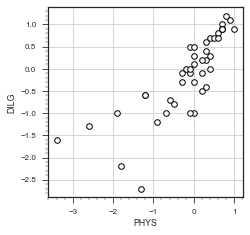

In [6]:
DILG = "7.3 8.5 7.8 8.8 6.5 8.5 8.7 5.1 8.7 8.1 7.4 7.2 6.8 6.8 8.0 7.7 7.2 7.5 7.8 6.6 7.1 6.8 6.2 7.7 8.6 8.9 8.0 8.7 8.2 9.0 8.4 7.9 8.5 8.7 5.6 8.3 8.1 7.8 6.8 8.3 7.0 7.7 7.5"
PHYS = "8.3 8.5 7.9 8.8 5.5 8.6 9.1 6.8 8.8 8.5 8.4 6.9 8.1 6.2 8.4 8.0 6.9 8.1 8.0 7.2 7.5 7.4 4.7 7.8 8.7 9.0 8.3 8.8 8.4 8.9 8.4 8.1 8.7 8.8 6.3 8.0 8.1 8.5 8.0 8.1 7.6 8.3 7.8"

DILG = [float(x) for x in DILG.split(" ")]
PHYS = [float(x) for x in PHYS.split(" ")]

X = np.array(PHYS)
X -= np.median(X)
Xs = X.reshape(-1,1)
Y = np.array(DILG)
Y -= np.median(Y)
xrange = np.array([-4.,2.])
xranges = xrange.reshape(-1,1)

plt.figure(figsize=(3.5,3.5))
plt.scatter(X, Y,  c='w', edgecolors='k', linewidths=1.0)
plt.ylabel('DILG')
plt.xlabel('PHYS')
plt.grid(1)
plt.minorticks_on()
plt.show()

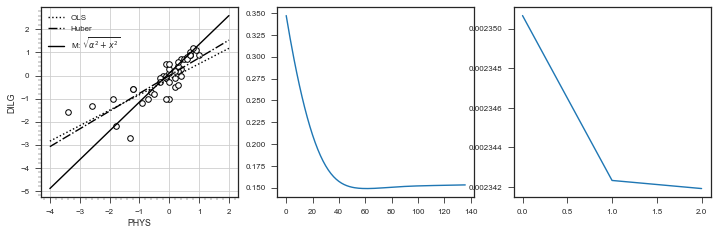

In [7]:
func_ols = model.LinearModel(np.random.random(2))
loss_sq = loss.ErrorLoss(func.Square())
loss_abs = loss.ErrorLoss(func.Absolute())
er_ols = erisk(Xs, Y, func_ols, loss_sq)
fg_ols = erm_fg(er_ols, h=0.01)

# func_abs = model.LinearModel(np.random.random(2))
# loss_abs = loss.ErrorLoss(func.Absolute())
# erm_fg(Xs, Y, func_abs, loss_abs, h=0.01, tol=1.0e-8)

func_hub = model.LinearModel(np.random.random(2))
loss_hub = loss.ErrorLoss(func.Huber(1.5))
er_hub = erisk(Xs, Y, func_hub, loss_sq)
erm_fg(er_hub, h=0.01, tol=1.0e-7)

# func_sqrt = model.LinearModel(np.random.random(2))
# fg_sqrt = fg(func_sqrt, loss_sq, h=0.01, tol=1.0e-6)
# wt_sqrt = weights.RWeights(func.Sqrt(0.001), fg_sqrt)
# irgd_sqrt = erm_irgd(Xs, Y, fg_sqrt, wt_sqrt)

func_m_sqrt = model.LinearModel(np.random.random(2))
loss_sq2 = loss.ErrorLoss(func.Square())
er_m_sqrt = erisk(Xs, Y, func_m_sqrt, loss_sq)
fg_m_sqrt = fg(er_m_sqrt, h=0.01)
avr_sqrt = averager_it(func.QuantileFunc(0.5, func.Sqrt(0.001)))
wt_m_sqrt = weights.WMWeights(avr_sqrt, er_m_sqrt)
irgd_m_sqrt = erm_irgd(fg_m_sqrt, wt_m_sqrt, n_iter=50, tol=1.0e-6)

plt.figure(figsize=(12.0,3.5))
plt.subplot(1,3,1)
plt.scatter(X, Y, c='w', edgecolors='k', linewidths=1.0)
plt.plot(xrange, func_ols.evaluate_all(xranges), label=r'OLS', color='k', linestyle=':')
#plt.plot(xrange, func_abs.evaluate_all(xranges), label=r'LAD', color='k', linestyle='--')
#plt.plot(xrange, func_sqrt.evaluate_all(xranges), label=r'R: $\sqrt{\alpha^2+x^2}$', color='k', linestyle='-.')
plt.plot(xrange, func_hub.evaluate_all(xranges), label=r'Huber', color='k', linestyle='-.')
plt.plot(xrange, func_m_sqrt.evaluate_all(xranges), label=r'M: $\sqrt{\alpha^2+x^2}$', color='k', linestyle='-')
plt.ylabel('DILG')
plt.xlabel('PHYS')
plt.legend()
plt.grid(1)
plt.minorticks_on()
plt.subplot(1,3,2)
plt.plot(fg_ols.lvals, label='ols')
plt.subplot(1,3,3)
plt.plot(fg_m_sqrt.lvals, label='M')
plt.show()

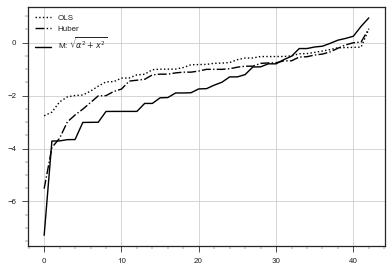

In [8]:
nrange=range(len(X))
plt.plot(nrange, np.log(sorted([abs(y-func_ols(x)) for x,y in zip(Xs,Y)])), label=r'OLS', color='k', linestyle=':')
#plt.plot(nrange, np.log(sorted([abs(y-func_abs(x)) for x,y in zip(Xs,Y)])), label=r'LAD', color='k', linestyle='--')
#plt.plot(nrange, np.log(sorted([abs(y-func_sqrt(x)) for x,y in zip(Xs,Y)])), label=r'R: $\sqrt{\alpha^2+x^2}$', color='k', linestyle='-.')
plt.plot(nrange, np.log(sorted([abs(y-func_hub(x)) for x,y in zip(Xs,Y)])), label=r'Huber', color='k', linestyle='-.')
plt.plot(nrange, np.log(sorted([abs(y-func_m_sqrt(x)) for x,y in zip(Xs,Y)])), label=r'M: $\sqrt{\alpha^2+x^2}$', color='k', linestyle='-')
plt.legend()
plt.grid(1)
plt.minorticks_on()
plt.show()
